In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Insights to be drawn -
● Get all the cars and their types that do not qualify for clean alternative fuel vehicle

● Get all TESLA cars with the model year, and model type made in Bothell City.

● Get all the cars that have an electric range of more than 100, and were made after
2015

● Draw plots to show the distribution between city and electric vehicle type

In [2]:
data=pd.read_csv("D:\plaement_assignment\python\Electric_Vehicle_Population_Data.csv")
data.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10


In [3]:
# rename columns 
data= data.rename(columns={'Postal Code': 'PostalCode', 'Model Year': 'ModelYear', 'Electric Vehicle Type': 'Electric_Vehicle_Type', 
                        'Clean Alternative Fuel Vehicle (CAFV) Eligibility': 'CAFV_Eligibility',
                        'Electric Range':'Electric_Range', 'Base MSRP': 'Base_MSRP', 'Legislative District':'Legislative_District',
                        'DOL Vehicle ID': 'DOL_Vehicle_ID',
                        'Vehicle Location':'Vehicle_Location',
                        'Electric Utility':'Electric_Utility',
                        '2020 Census Tract':'2020_Census_Tract',
                        'VIN (1-10)':'VIN'})

In [4]:
data.info(),data.shape,data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130443 entries, 0 to 130442
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VIN                    130443 non-null  object 
 1   County                 130440 non-null  object 
 2   City                   130440 non-null  object 
 3   State                  130443 non-null  object 
 4   PostalCode             130440 non-null  float64
 5   ModelYear              130443 non-null  int64  
 6   Make                   130443 non-null  object 
 7   Model                  130221 non-null  object 
 8   Electric_Vehicle_Type  130443 non-null  object 
 9   CAFV_Eligibility       130443 non-null  object 
 10  Electric_Range         130443 non-null  int64  
 11  Base_MSRP              130443 non-null  int64  
 12  Legislative_District   130138 non-null  float64
 13  DOL_Vehicle_ID         130443 non-null  int64  
 14  Vehicle_Location       130410 non-nu

(None,
 (130443, 17),
 Index(['VIN', 'County', 'City', 'State', 'PostalCode', 'ModelYear', 'Make',
        'Model', 'Electric_Vehicle_Type', 'CAFV_Eligibility', 'Electric_Range',
        'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
        'Vehicle_Location', 'Electric_Utility', '2020_Census_Tract'],
       dtype='object'))

# ● Get all the cars and their types that do not qualify for clean alternative fuel vehicle


In [5]:
data["CAFV_Eligibility"].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

In [6]:
df=data.groupby(["Make","CAFV_Eligibility"])["Electric_Vehicle_Type"].sum().reset_index()

In [7]:
df[df["CAFV_Eligibility"]!="Clean Alternative Fuel Vehicle Eligible"][:10]

,Make,CAFV_Eligibility,Electric_Vehicle_Type
1,AUDI,Eligibility unknown as battery range has not b...,Battery Electric Vehicle (BEV)Battery Electric...
2,AUDI,Not eligible due to low battery range,Plug-in Hybrid Electric Vehicle (PHEV)Plug-in ...
4,BENTLEY,Not eligible due to low battery range,Plug-in Hybrid Electric Vehicle (PHEV)Plug-in ...
6,BMW,Eligibility unknown as battery range has not b...,Battery Electric Vehicle (BEV)Battery Electric...
7,BMW,Not eligible due to low battery range,Plug-in Hybrid Electric Vehicle (PHEV)Plug-in ...
9,CADILLAC,Eligibility unknown as battery range has not b...,Battery Electric Vehicle (BEV)Battery Electric...
11,CHEVROLET,Eligibility unknown as battery range has not b...,Battery Electric Vehicle (BEV)Battery Electric...
16,FORD,Eligibility unknown as battery range has not b...,Battery Electric Vehicle (BEV)Battery Electric...
17,FORD,Not eligible due to low battery range,Plug-in Hybrid Electric Vehicle (PHEV)Plug-in ...
18,GENESIS,Eligibility unknown as battery range has not b...,Battery Electric Vehicle (BEV)Battery Electric...


# ● Get all TESLA cars with the model year, and model type made in Bothell City.

In [8]:
data.head(3)

,VIN,County,City,State,PostalCode,ModelYear,Make,Model,Electric_Vehicle_Type,CAFV_Eligibility,Electric_Range,Base_MSRP,Legislative_District,DOL_Vehicle_ID,Vehicle_Location,Electric_Utility,2020_Census_Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10


In [28]:
car_in_city=data[(data["City"]=="Bothell") & (df1["Make"]=="TESLA")]
car_in_city.loc[:,["Make","Model","ModelYear","City"]][:10]

,Make,Model,ModelYear,City
7747,TESLA,MODEL Y,2023,Bothell
7749,TOYOTA,PRIUS PRIME,2017,Bothell
7812,TESLA,MODEL Y,2020,Bothell
7819,TESLA,MODEL 3,2020,Bothell
7945,NISSAN,LEAF,2013,Bothell
7974,TESLA,MODEL Y,2022,Bothell
8051,VOLVO,XC60,2021,Bothell
8062,NISSAN,LEAF,2021,Bothell
8084,TESLA,MODEL Y,2020,Bothell
8151,KIA,NIRO,2019,Bothell


## ● Get all the cars that have an electric range of more than 100, and were made after 2015

In [17]:
data.head(2)

,VIN,County,City,State,PostalCode,ModelYear,Make,Model,Electric_Vehicle_Type,CAFV_Eligibility,Electric_Range,Base_MSRP,Legislative_District,DOL_Vehicle_ID,Vehicle_Location,Electric_Utility,2020_Census_Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10


In [23]:

ele_range=data[(data["Electric_Range"]>100) & (data["ModelYear"]>2015)]
ele_range.loc[:,["Make","Electric_Range","ModelYear"]]


,Make,Electric_Range,ModelYear
0,TESLA,238,2018
2,TESLA,220,2019
4,TESLA,210,2017
12,TESLA,308,2020
13,TESLA,322,2020
...,...,...,...
130417,TESLA,291,2020
130428,NISSAN,151,2018
130432,TESLA,291,2020
130436,TESLA,215,2018


### ● Draw plots to show the distribution between city and electric vehicle type

In [29]:
data.head(3)

,VIN,County,City,State,PostalCode,ModelYear,Make,Model,Electric_Vehicle_Type,CAFV_Eligibility,Electric_Range,Base_MSRP,Legislative_District,DOL_Vehicle_ID,Vehicle_Location,Electric_Utility,2020_Census_Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10


### ● Draw plots to show the distribution between city and electric vehicle type

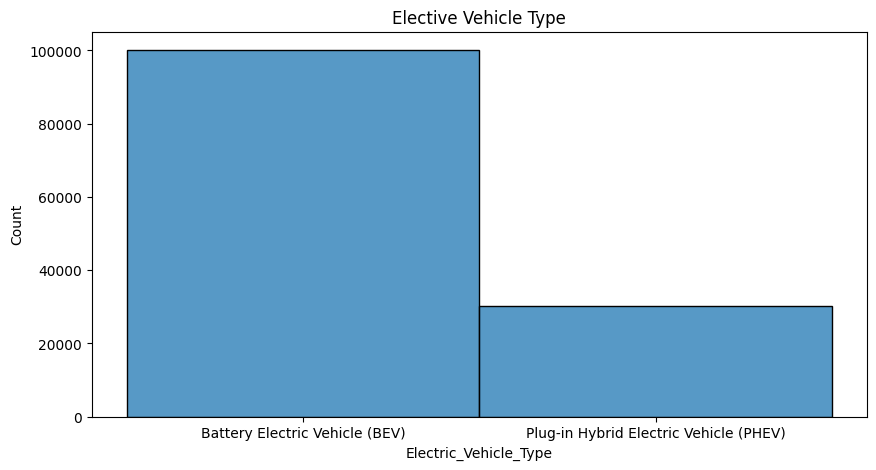

In [43]:
plt.figure(figsize=(10,5))

sns.histplot(data["Electric_Vehicle_Type"])
plt.title("Elective Vehicle Type")
plt.show()

<Axes: xlabel='City', ylabel='Count'>

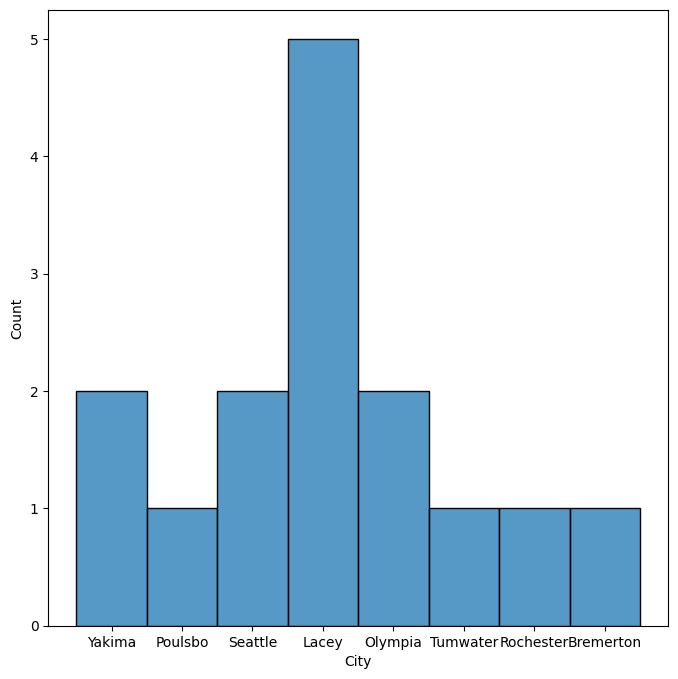

In [70]:
plt.figure(figsize=(8,8))
sns.histplot(data["City"][:15])

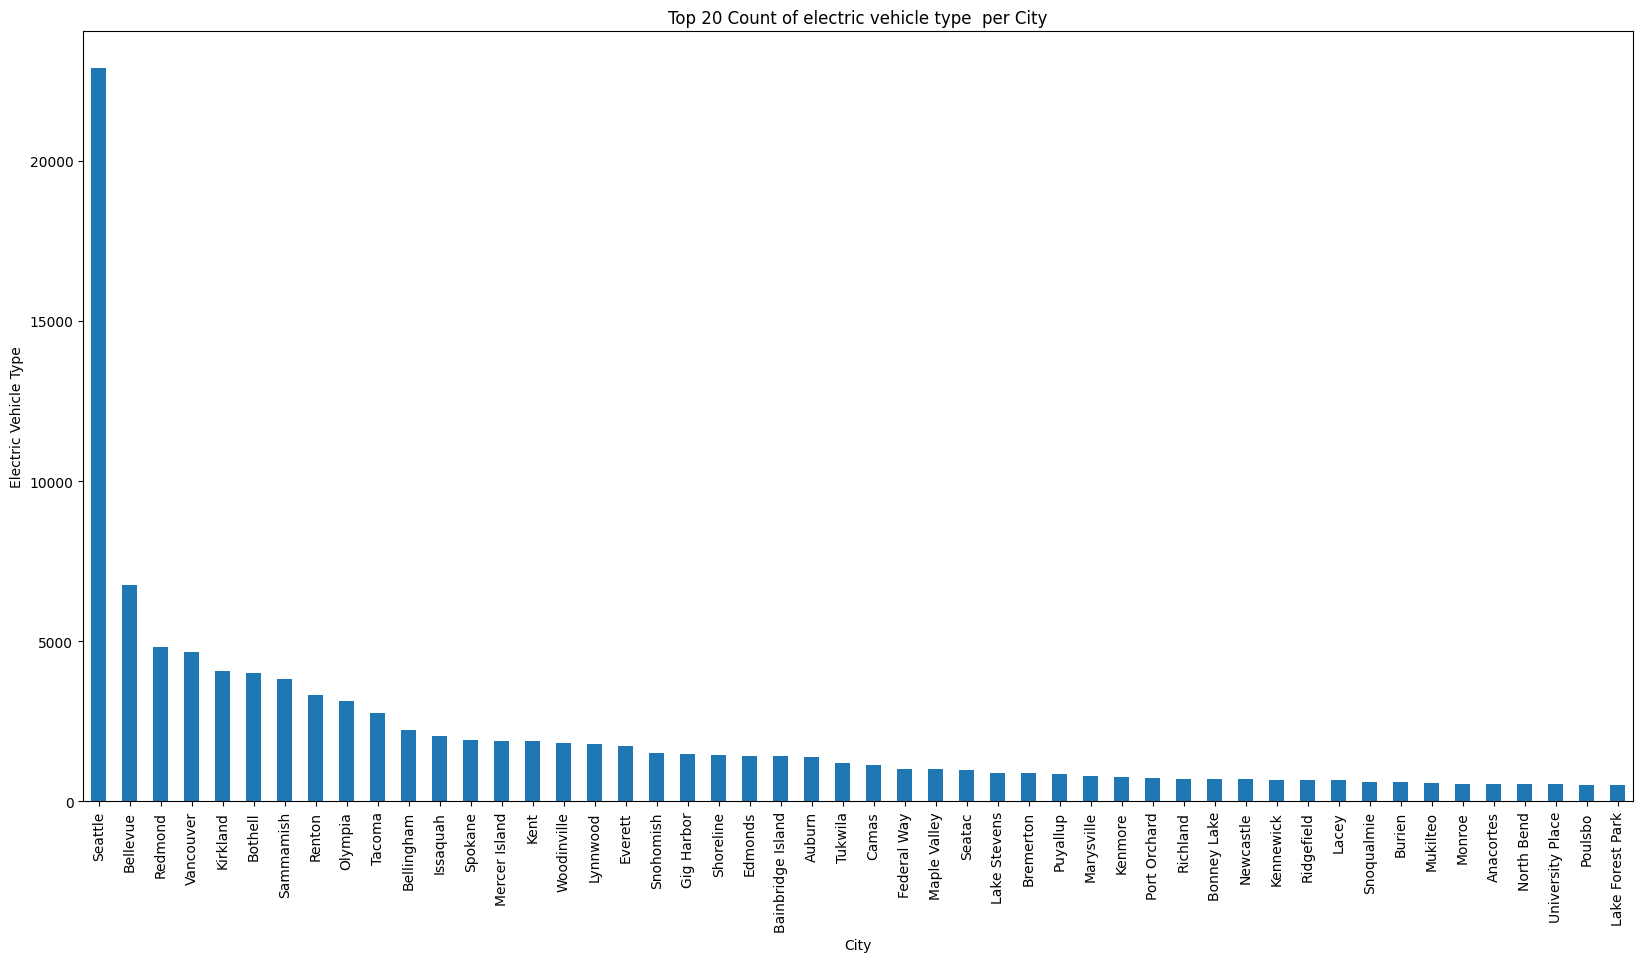

,count
City,
Seattle,22894
Bellevue,6748
Redmond,4820
Vancouver,4652
Kirkland,4071
Bothell,4024
Sammamish,3819
Renton,3311
Olympia,3140


In [45]:
car_counts_Cty = data['City'].value_counts().nlargest(50)

# plot the counts
plt.figure(figsize=(20,10))
car_counts_Cty.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Electric Vehicle Type')
plt.title('Top 20 Count of electric vehicle type  per City')
plt.show()

car_counts_cty_df = car_counts_Cty.to_frame()
car_counts_cty_df.style.background_gradient(cmap='Blues')